# **Import Libraries**

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np
shap.initjs()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

# **Task 1: Data Preprocessing**

## **Step 01: Load the dataset and inspect the data structure (e.g., shape, missing values, data types).**

Using `pandas` library I loaded the dataset into my colab notebook and I output first 5 rows of the dataset.

In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


To get the shape of the dataset, I used `shape` function.

In [5]:
df.shape

(1470, 35)

Next, to find the missing values in the dataset, I used `isnull().sum()` function.

In [6]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Based on the output, the dataset does not contains any missing values.

To find the each column's datatype, I used `info()` function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## **Step 02: Handle missing data appropriately. Justify your approach (imputation, deletion, etc.).**


There are no missing values.

## **Step 03: Convert categorical features into numerical format (e.g., one-hot encoding or label encoding).**

As a first step, I extract categorical columns from the dataframe

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

Next I initialized `OneHotEncoder`.

In [9]:
encoder = OneHotEncoder(sparse_output=False)

Next I applied one-hot encoding to the categorical columns.

In [10]:
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_encoded

array([[0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

Next, I create a DataFrame with the one-hot encoded columns

In [11]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

I combined the one-hot encoded dataframe with the original dataframe `df`.

In [12]:
df_encoded = pd.concat([df, one_hot_df], axis=1)

Drop the original categorical columns

In [13]:
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Now, I successfully encoded all the categorical columns into numerical values.

## **Step 04: Scale numerical features where necessary (e.g., using MinMaxScaler or StandardScaler).**

In [14]:
df_encoded.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


Based on the output, the mean and the standard deviation both are spread in wide range. Therefore, I need to scale the mean to 0 and standand deviation to 1.

First, I initialized `StandardScalar`.

In [15]:
scalar = StandardScaler()

Then fit and transform the dataframe `df_encoded`.

In [16]:
df_scaled = scalar.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,0.0,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,0.0,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.0,1.721670,0.254625,-1.224807,1.785511,-0.057788,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
1466,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.723332,1.169781,-1.175601,-1.026167,0.845911,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241
1467,-1.086676,-1.605183,-0.640727,0.085049,0.0,1.726655,-0.660531,1.038693,1.785511,-0.057788,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.0,-1.591746,1.591746
1468,1.322365,0.546677,-0.887515,0.085049,0.0,1.728317,1.169781,-0.142264,-1.026167,-0.057788,...,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,0.0,0.628241,-0.628241


In [17]:
df_scaled.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03
mean,-3.504377e-17,5.075305e-17,4.350262e-17,7.008755e-17,0.0,-1.546760e-16,1.305078e-16,1.691768e-16,6.525392e-17,-2.658493e-17,...,5.256566e-17,-4.471102e-17,1.208406e-18,1.450087e-17,-2.175131e-17,1.208406e-16,-4.471102e-17,0.0,4.350262e-17,-4.350262e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,0.0,1.000340e+00,1.000340e+00
min,-2.072192e+00,-1.736576e+00,-1.010909e+00,-1.868426e+00,0.0,-1.701283e+00,-1.575686e+00,-1.766079e+00,-2.432006e+00,-9.614864e-01,...,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-5.348731e-01,-9.189214e-01,-6.855655e-01,0.0,-1.591746e+00,-6.282411e-01
25%,-7.581700e-01,-8.366616e-01,-8.875151e-01,-8.916883e-01,0.0,-8.866700e-01,-6.605307e-01,-8.803615e-01,-1.026167e+00,-9.614864e-01,...,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-5.348731e-01,-9.189214e-01,-6.855655e-01,0.0,-1.591746e+00,-6.282411e-01
50%,-1.011589e-01,-1.204135e-03,-2.705440e-01,8.504925e-02,0.0,-7.253514e-03,2.546249e-01,5.355811e-03,3.796721e-01,-5.778755e-02,...,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-5.348731e-01,-9.189214e-01,-6.855655e-01,0.0,6.282411e-01,-6.282411e-01
75%,6.653541e-01,8.788772e-01,5.932157e-01,1.061787e+00,0.0,8.821327e-01,1.169781e+00,8.787715e-01,3.796721e-01,8.459113e-01,...,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-5.348731e-01,1.088232e+00,1.458650e+00,0.0,6.282411e-01,1.591746e+00
max,2.526886e+00,1.726730e+00,2.444129e+00,2.038524e+00,0.0,1.733302e+00,1.169781e+00,1.678377e+00,1.785511e+00,2.653309e+00,...,4.168333e+00,2.008543e+00,1.873287e+00,4.087890e+00,1.869602e+00,1.088232e+00,1.458650e+00,0.0,6.282411e-01,1.591746e+00


Now I successfully scaled the dataset. Based on the output you can see the mean value is near to 0 and the standard deviattion is 1.

# **Task 2: Feature Selection and Engineering**

## **Step 01: Perform correlation analysis or other methods (e.g., Mutual Information, Chi-Square test) to understand the relationship between features and the target variable.**

Overall correlation

In [18]:
df_scaled.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,NaN,-0.028062,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,NaN,-0.009135,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,NaN,-0.025514,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,NaN,0.020322,-0.020322
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189,NaN,0.024037,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,NaN,-0.070132,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436,NaN,0.007782,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,NaN,0.003507,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072,NaN,-0.000544,0.000544


Correlation with target variable `Attrition`

In [19]:
correlation = df_scaled.corr()['Attrition_Yes'].sort_values(ascending=False)
correlation

,Attrition_Yes
Attrition_Yes,1.000000
OverTime_Yes,0.246118
MaritalStatus_Single,0.175419
JobRole_Sales Representative,0.157234
BusinessTravel_Travel_Frequently,0.115143
JobRole_Laboratory Technician,0.098290
Department_Sales,0.080855
DistanceFromHome,0.077924
EducationField_Technical Degree,0.069355
EducationField_Marketing,0.055781


Based on the output you can see the correlation between features and the target variable.

## **Step 02: Engineer additional useful features (if applicable), such as calculating employee tenure or work-life balance scores.**


In the dataset, tenure and work-life balance are already availabe.

## **Step 03: Select the most important features using feature selection techniques(e.g., Recursive Feature Elimination, Lasso regularization).**

Before applying Recursive Feature Elimination, convert the data type of the columns to `int`.

In [20]:
df_scaled = df_scaled.astype({col: 'int' for col in df_scaled.select_dtypes(include=['float64']).columns})

To select important features using Recursive Feature Elimination, first choose target variable `y` and features `X`.

In [21]:
X = df_scaled.drop(columns=['Attrition_Yes', 'Attrition_No', 'Gender_Female', 'OverTime_No'])
y = df_scaled['Attrition_Yes']

Next, split the dataset into taining data and testing data by 80/20 ratio or other.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Initialize the RandomForest model or any preferred model.

In [23]:
model = RandomForestClassifier()

Next, Create `RFE` object and specify the number of features you want

In [24]:
rfe = RFE(estimator=model, n_features_to_select=5)

Next, fit the model in the training data

In [25]:
rfe = rfe.fit(X_train, y_train)

To get the important features,

In [26]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['Age', 'DistanceFromHome', 'JobInvolvement', 'WorkLifeBalance',
       'YearsWithCurrManager'],
      dtype='object')

Based oon the output the important features are `Age`, `DistanceFromHome`, `JobInvolvement`, `PercentSalaryHike`, and `WorkLifeBalance`.

# **Task 3: Model Selection and Building**

## **Step 01: Experiment with at least two different types of models (e.g., RandomForest, XGBoost, Neural Networks). One of the model types must be aNeural Network.**

I used RandomForest to build the model.

In [27]:
X = df_scaled[['Age', 'DistanceFromHome', 'JobInvolvement', 'PercentSalaryHike','WorkLifeBalance']]
y = df_scaled['Attrition_Yes']

Next, split the dataset into taining data and testing data by 80/20 ratio or other.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Initialize the RandomForest model.

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)

Accuracy: 0.84


2. Sequential Neural Network

In [75]:
X = df_scaled[['Age', 'DistanceFromHome', 'JobInvolvement', 'PercentSalaryHike','WorkLifeBalance']]
y = df_scaled['Attrition_Yes']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [94]:
model_nn = Sequential()
model.add(Dense(units=64, activation='relu'))
model.add(Dense(32, input_dim=784, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
my_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [96]:
model_nn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [98]:
history = model_nn.fit(
X_train, y_train,
batch_size=32,
epochs=10,
validation_data=(X_val, y_val) )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


24/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3457 - loss: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3475 - loss: 0.0000e+00 - val_accuracy: 0.3878 - val_loss: 0.0000e+00
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3846 - loss: 0.0000e+00 - val_accuracy: 0.4014 - val_loss: 0.0000e+00
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3850 - loss: 0.0000e+00 - val_accuracy: 0.4082 - val_loss: 0.0000e+00
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4030 - loss: 0.0000e+00 - val_accuracy: 0.4082 - val_loss: 0.0000e+00
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4027 - loss: 0.0000e+00 - val_accuracy: 0.4150 - val_loss: 0.0000e+00
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3951 - loss: 0.0000e+00 - val_accuracy: 0.4354 - val_loss: 0.0000e+00
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4120 - loss: 0.0000e+00 - val_accuracy: 0.4354 - val_loss: 0.0000e+00
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3984 - l

In [105]:
loss, accuracy_nn = model_nn.evaluate(X_test, y_test)
y_pred_nn = model_nn.predict(X_test)

print(f'Accuracy: {accuracy_nn:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 0.0000e+00 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.51


# **Task 4: Model Evaluation and Interpretation **

## **Step 01: Evaluate each model using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.**

In [34]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       255
           2       0.27      0.10      0.15        39

    accuracy                           0.84       294
   macro avg       0.57      0.53      0.53       294
weighted avg       0.79      0.84      0.81       294



In [37]:
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC: {auc:.2f}')

AUC-ROC: 0.53


## Step 02: Create confusion matrices and visualizations (e.g., ROC curves) to assess the performance of each model developed

In [40]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[244,  11],
       [ 35,   4]])

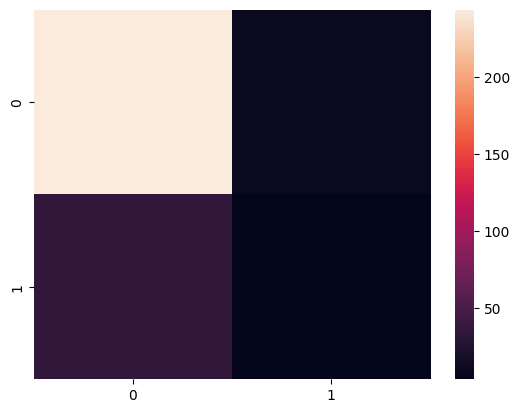

In [43]:
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

Use model interpretation techniques (e.g., SHAP values, feature
importance plots) to identify the features contributing the most to
employee attrition prediction

In [47]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

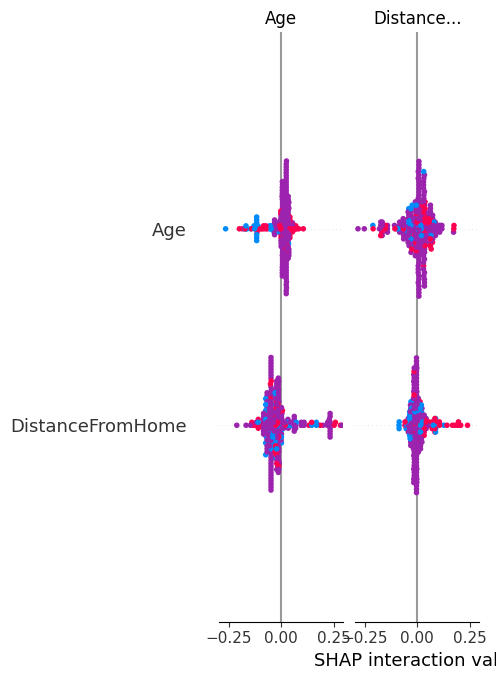

In [48]:
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Feature Importance')

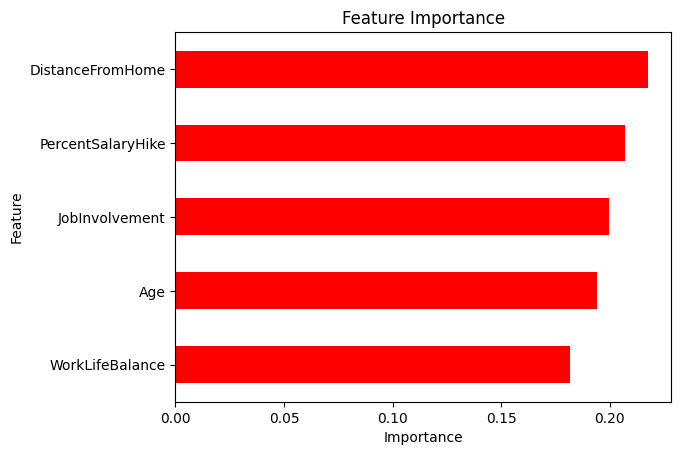

In [58]:
global_importances = pd.Series(model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='red')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

Task 5: Model Comparison

Step 01: Performance Metrics Comparison: Create a detailed comparison of
the models. Use tables and visualizations (e.g., side-by-side ROC
curves, precision-recall curves) to illustrate the differences.

Step 02: Strengths and Weaknesses: Analyze the strengths and weaknesses of
each model. Discuss which model performs better for different types of
employees or situations.

THe random foresst model has 0.84 accuracy and the neural network model has 0.90 accuracy. So neural network model has more accuracy